In [8]:
"""
Imports & Util functions
"""
!pip install matplotlib

import json
from matplotlib import pyplot as plt

plt.style.use('dark_background')

from IPython.display import display, HTML
import numpy as np

def print_dict(d, title): 

    html_content = """
<style>
    table {
        width: 50%;
        margin: 25px 0;
        border-collapse: collapse;

    }
    th, td {
        padding: 12px;
        border-bottom: 1px solid #ddd;
    }
    th {
        background-color: #f2f2f2;
        color: black;
    }
    tr:hover {
        background-color: #f5f5f5;
    }
</style>
"""

    html_content += f"""
    <table>
    <tr>
        <th>{title}</th>
        <th></th>
    </tr>"""

    for name, val in d.items():
        html_content += f"<tr><td>{name}</td><td>{val}</td></tr>"
    
    html_content += "</table>"
    
    # Display the HTML content
    display(HTML(html_content))


def exp_moving_average(data, alpha=0.1):
    ema = np.zeros_like(data)
    ema[0] = data[0]
    for t in range(1, len(data)):
        ema[t] = alpha * data[t] + (1 - alpha) * ema[t - 1]
    return ema


def load_json(json_path):
    with open(json_path) as f:
        d = json.load(f)  
    # print('Loaded JSON with Keys:', list(d.keys()))
    return d

In [9]:
"""
Dataset - summary and sample inputs and outputs.
"""

json_path = '/workspace/Bayesian_PEFT/export/training_stats.json'
d = load_json(json_path)

print_dict(d['dataset'], 'Dataset Summary')

prompts, labels = d['sample_prompts'][:10], d['sample_classes'][:10]

for i, (prompt, label) in enumerate(zip(prompts, labels)):
    print(f""" 
### Prompt {i} ###

{prompt}

Correct output: {label} 
    """)


Dataset Summary,
name,arc
training_data_size,2250


 
### Prompt 0 ###

Return the label of the correct answer for the question below.

Question: Which factor will most likely cause a person to develop a fever?
Choices:
a leg muscle relaxing after exercise) A
a bacterial population in the bloodstream) B
several viral particles on the skin) C
carbohydrates being digested in the stomach) D
Answer:

Correct output: 1 
    
 
### Prompt 1 ###

Return the label of the correct answer for the question below.

Question: Lichens are symbiotic organisms made of green algae and fungi. What do the green algae supply to the fungi in this symbiotic relationship?
Choices:
carbon dioxide) A
food) B
protection) C
water) D
Answer:

Correct output: 1 
    
 
### Prompt 2 ###

Return the label of the correct answer for the question below.

Question: When a switch is used in an electrical circuit, the switch can
Choices:
cause the charge to build.) A
increase and decrease the voltage.) B
cause the current to change direction.) C
stop and start the flow of c

Model Summary,
name,phi
lora_r,8
is_s2s,False
batch_size,6


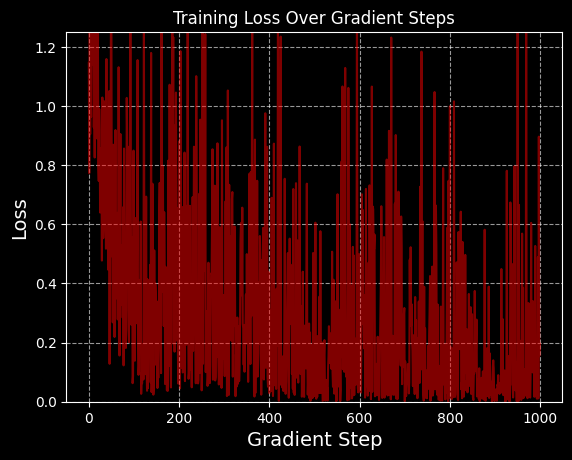

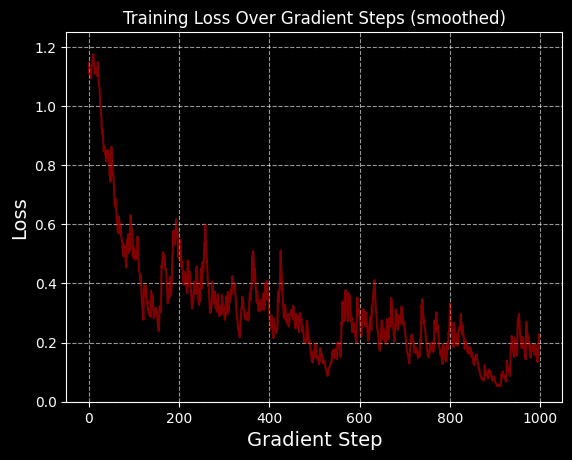

In [10]:
"""
Model - summary and training loss.
"""

print_dict(d['model'], 'Model Summary')
print(d.keys())
losses, valid_losses = d['losses'], d['valid_losses']

losses = {int(k):v for k,v in losses.items()}
valid_losses = {int(k):v for k,v in valid_losses.items()}

train_steps = sorted(losses.keys())
train_losses = [losses[s] for s in train_steps]

valid_steps = sorted(valid_losses.keys())
valid_losses = [valid_losses[s] for s in valid_steps]

print('train_steps', train_steps[:10])
print('valid_steps', valid_steps[:10])

def plot_loss(train_steps, train_losses, valid_steps, valid_losses, title):
    
    plt.title(title, fontsize=12)
    plt.xlabel('Gradient Step', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

    plt.plot(train_steps, train_losses, linestyle='-', color='b', alpha=0.5) # marker='o', 
    plt.plot(valid_steps, valid_losses, linestyle='-', color='r', alpha=0.5, marker='o', label='validation')
    
    # plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 1.25)
    plt.show()

# plot_loss(train_steps, train_losses, valid_steps, valid_losses, 'Training Loss Over Gradient Steps')

train_losses_smooth = exp_moving_average(train_losses, alpha=0.1)
# valid_losses_smooth = exp_moving_average(valid_losses, alpha=0.1)
plot_loss(train_steps, train_losses_smooth, valid_steps, valid_losses, 'Training Loss Over Gradient Steps (smoothed)')

In [4]:
"""
Validation log-likelihood. 
"""

ll = np.load('/workspace/Bayesian_PEFT/example_outputs/arc_gpt2/ll.npy')
print(ll)



()
-802.8477


In [ ]:
"""
Prior variance optimization. 

This does not work - produces nan values in the loss. 


"""


In [ ]:
"""
Results

TODO undersdand what the value in variance mean 


Metrics
- NLL = Negative log-likelihood (cross-entropy)
- ACC = Accuracy
- ECE = Expected Calibration Error

Results with different Prior Variance
    Baseline  -  NLL: 0.41716, ACC: 0.86268, ECE: 0.04673  --> Baseline: Finetuned model without Laplace
    
    Var 1     -  NLL: nan,     ACC: 0.54049, ECE: 0.22699
    Var 0.1   -  NLL: 1.41531, ACC: 0.79401, ECE: 0.36347 
    Var 0.01  -  NLL: 1.18446, ACC: 0.86444, ECE: 0.15981
    Var 0.001 -  NLL: 1.08173, ACC: 0.86268, ECE: 0.02428  --> The only case with better ECE compared to the baseline, but worse NLL
    Var 3e-4  -  NLL: 1.06210, ACC: 0.86092, ECE: 0.04448
    Var 1e-4  -  NLL: 1.06383, ACC: 0.86444, ECE: 0.04857
    Var 1e-5  -  NLL: 1.06215, ACC: 0.86444, ECE: 0.04143
"""


